In [1]:
# 6. Возраст и доход
# Исследование: как уровень дохода зависит от возраста
#     - В каком возрасте люди достигают наибольшего дохода
#     - Рассмотреть этот показатель отдельно для нескольких профессий

In [2]:
from dataframes import dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Создание датафрейма

Составим список необходимых в работе столбцов

In [3]:
# Список нужных столбцов
columns_needed = ['age', 'occ10', 'realrinc']

Создаем пустой датафрейм для объединения

In [4]:
# Создаём пустой датафрейм для объединения
df = pd.DataFrame()

Отбираем нужные столбцы из каждого датафрейма

In [5]:
# Проходим по каждому датафрейму
for year, dd in dataframes.items():
    available_columns = [col for col in columns_needed if col in dd.columns]
    print(available_columns, year)
    if available_columns:
        temp_df = dd[available_columns].copy()
        temp_df['year'] = int(year)  # Добавляем год опроса
        df = pd.concat([df, temp_df], ignore_index=True)

['age', 'occ10', 'realrinc'] 2010
['age', 'occ10', 'realrinc'] 2012
['age', 'occ10', 'realrinc'] 2014
['age', 'occ10', 'realrinc'] 2016
['age', 'occ10', 'realrinc'] 2018
['age', 'occ10', 'realrinc'] 2021
['age', 'occ10', 'realrinc'] 2022


Отображение нового датафрейма и его размеров

In [6]:
df['realrinc'] = df['realrinc'].apply(lambda x: x if x < 100_000 else 100_000)

In [7]:
# Проверяем результат
print("Размер нового датафрейма:", df.shape)
print("\nПервые 50 строк датафрейма:")
print(df.iloc[:50])

# Проверяем, какие столбцы в итоге есть
print("\nСтолбцы в новом датафрейме:", df.columns.tolist())

Размер нового датафрейма: (19952, 4)

Первые 50 строк датафрейма:
     age   occ10  realrinc  year
0   31.0   800.0   42735.0  2010
1   23.0   740.0    3885.0  2010
2   71.0  9120.0  100000.0  2010
3   82.0     NaN  100000.0  2010
4   78.0  6220.0  100000.0  2010
5   40.0  8140.0    5827.5  2010
6   46.0   120.0   42735.0  2010
7   80.0  3600.0  100000.0  2010
8   31.0   350.0  100000.0  2010
9    NaN  3600.0  100000.0  2010
10  31.0  4150.0   12302.5  2010
11  21.0     NaN  100000.0  2010
12  58.0  4220.0   19425.0  2010
13  36.0     NaN  100000.0  2010
14  57.0  4220.0  100000.0  2010
15  28.0  4230.0  100000.0  2010
16  80.0  5700.0  100000.0  2010
17  84.0  8320.0  100000.0  2010
18  51.0     NaN  100000.0  2010
19  35.0  7420.0   42735.0  2010
20  49.0  6355.0   28490.0  2010
21  56.0  9140.0   28490.0  2010
22  88.0  8256.0  100000.0  2010
23  23.0     NaN  100000.0  2010
24  35.0   726.0   34965.0  2010
25  26.0   850.0   62160.0  2010
26  21.0     NaN  100000.0  2010
27  21.0  

Для удобства меняем название столбца "occ10" на "occ":

In [8]:

df.rename(columns={'occ10':'occ'}, inplace=True)

Выведем на экран первые 50 строк датафрейма после переименования столбца:

In [9]:
print("\nПервые 50 строк датафрейма после переименования:")
print(df.iloc[:50])


Первые 50 строк датафрейма после переименования:
     age     occ  realrinc  year
0   31.0   800.0   42735.0  2010
1   23.0   740.0    3885.0  2010
2   71.0  9120.0  100000.0  2010
3   82.0     NaN  100000.0  2010
4   78.0  6220.0  100000.0  2010
5   40.0  8140.0    5827.5  2010
6   46.0   120.0   42735.0  2010
7   80.0  3600.0  100000.0  2010
8   31.0   350.0  100000.0  2010
9    NaN  3600.0  100000.0  2010
10  31.0  4150.0   12302.5  2010
11  21.0     NaN  100000.0  2010
12  58.0  4220.0   19425.0  2010
13  36.0     NaN  100000.0  2010
14  57.0  4220.0  100000.0  2010
15  28.0  4230.0  100000.0  2010
16  80.0  5700.0  100000.0  2010
17  84.0  8320.0  100000.0  2010
18  51.0     NaN  100000.0  2010
19  35.0  7420.0   42735.0  2010
20  49.0  6355.0   28490.0  2010
21  56.0  9140.0   28490.0  2010
22  88.0  8256.0  100000.0  2010
23  23.0     NaN  100000.0  2010
24  35.0   726.0   34965.0  2010
25  26.0   850.0   62160.0  2010
26  21.0     NaN  100000.0  2010
27  21.0  4130.0    1036.0

# Очистка данных

Проверка датафрейма на наличие пропусков

In [10]:
# Проверка на пропуски
print("Пропуски до очистки:")
print(df.isnull().sum())

Пропуски до очистки:
age          623
occ         1528
realrinc       0
year           0
dtype: int64


Далее необходимо удалить все пропущенные значения в столбцах "age", "occ" и "realrinc", после чего проверяется размер датафрейма

In [11]:
# Удаление всех строк с NaN
cols_to_dropna = ['age', 'occ', 'realrinc']
df.dropna(subset=cols_to_dropna, inplace=True)
print('Размер датафрейма:', df.shape)

Размер датафрейма: (17921, 4)


В датафрейме осталось 11094 записи, что является достаточным количеством для проведения последующего анализа. После этого осуществляем проверку пропущенных и неопределенных значений в столбцах после очистки

In [12]:
# Проверка пропусков после очистки
print("Пропуски после очистки:")
print(df.isnull().sum())

Пропуски после очистки:
age         0
occ         0
realrinc    0
year        0
dtype: int64


Также отобразим ключевую информацию о датафрейме

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17921 entries, 0 to 19346
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       17921 non-null  float64
 1   occ       17921 non-null  float64
 2   realrinc  17921 non-null  float64
 3   year      17921 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 700.0 KB


Проверим данные на наличие выбросов. Начнем со столбца "realrinc", отображающего реальный доход человека после вычета налогов:

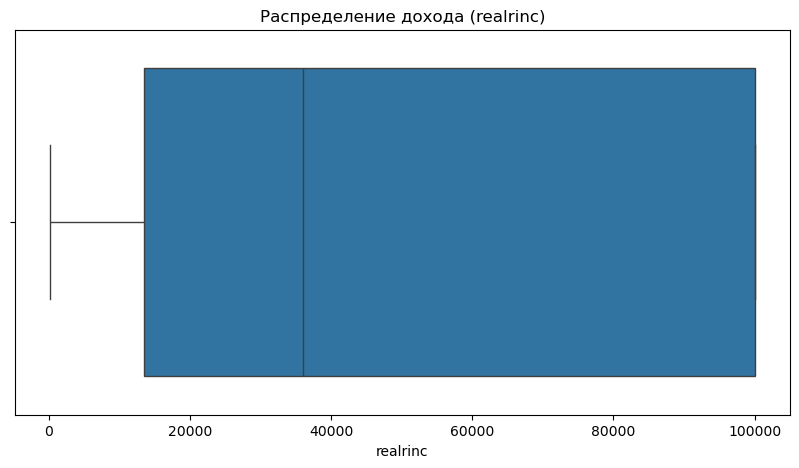

In [14]:
# Проверяем наличие выбросов в столбце "realrinc"
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['realrinc'])
plt.title('Распределение дохода (realrinc)')
plt.show()

Проверим столбец age (возраст) на наличие выбросов:

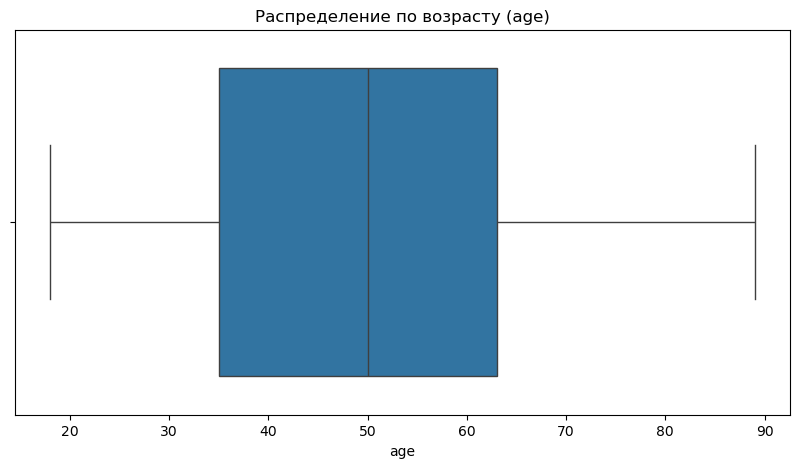

In [15]:
# Проверяем наличие выбросов в столбце "age"
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['age'])
plt.title('Распределение по возрасту (age)')
plt.show()

В данном случае выбросы отсутствуют. Следовательно, очистка данных на этом этапе не требуется.

# Описательная статистика

Далее необходимо отобразить наиболее важные статистические показатели датафрейма. Для числовых переменных это будут: кол-во значений, минимум и максимум, среднее арифметическое, медиана, 1-й и 3-й квартили, а также среднекваратическое отклонение. Для категориальных переменных: кол-во всех значений, кол-во уникальных значений, мода и ее численность. Эти показатели необходимы для дальнейшего анализа данных и решения последующих задач. Также будет полезно узнать наиболее распространенные профессии в выборке, поскольку они пригодятся нам в будущем.

In [16]:
# Описательная статистика 

# Для числовых переменных
print("\nОписательная статистика числовых переменных:")
print(df[['age', 'realrinc']].describe())

# Для категориальной переменной (профессия)
print("\nУникальные значения профессий (occ):", df['occ'].nunique())
print(df['occ'].astype('category').describe())

# Наиболее популярные профессии
print("\nТоп-10 самых распространенных профессий:")
print(df['occ'].value_counts().head(10))


Описательная статистика числовых переменных:
                age       realrinc
count  17921.000000   17921.000000
mean      50.016350   52466.360415
std       17.436249   41067.647245
min       18.000000     204.500000
25%       35.000000   13475.000000
50%       50.000000   35970.000000
75%       63.000000  100000.000000
max       89.000000  100000.000000

Уникальные значения профессий (occ): 502
count     17921.0
unique      502.0
top        2310.0
freq        449.0
Name: occ, dtype: float64

Топ-10 самых распространенных профессий:
occ
2310.0    449
5700.0    435
3255.0    385
3600.0    384
4760.0    365
9130.0    340
430.0     331
4700.0    312
4220.0    308
5240.0    297
Name: count, dtype: int64


Промежуточные выводы:
1. Распределение по возрасту кажется относительно сбалансированным (средний возраст и медиана почти одинаковые), однако для точного определения степени симметрии необходимо визуализировать данные на гистограмме. Выборка включает все основные возрастные группы трудоспособного населения, что обеспечивает представительность анализа.
2. Доход предсказуемо имеет очень сильный разброс и большое стандартное отклонение. Медиана значительно ниже среднего, что свидетельствует о правосторонней асимметрии распределения.
3. Столбец "occ" содержит 476 уникальных профессий, при этом распределение этих профессий достаточно неравномерное.
4. В топ-10 наиболее распространенных профессий вошли: учитель, медицинский работник, продавец, повар, секретарь, грузчик, сотрудник службы поддержки клиентов, уборщик, водитель, кассир.

# Визуализация данных

Определим характер распределения числовых факторов датафрейма. Для столбца, отображающего возраст респондентов, строится обычная гистограмма с "гладкой" кривой плотности распределения. Что касается распределения доходов, то здесь логичным решением будет применить логарифмирование, поскольку в данных имеется сильный перекос.

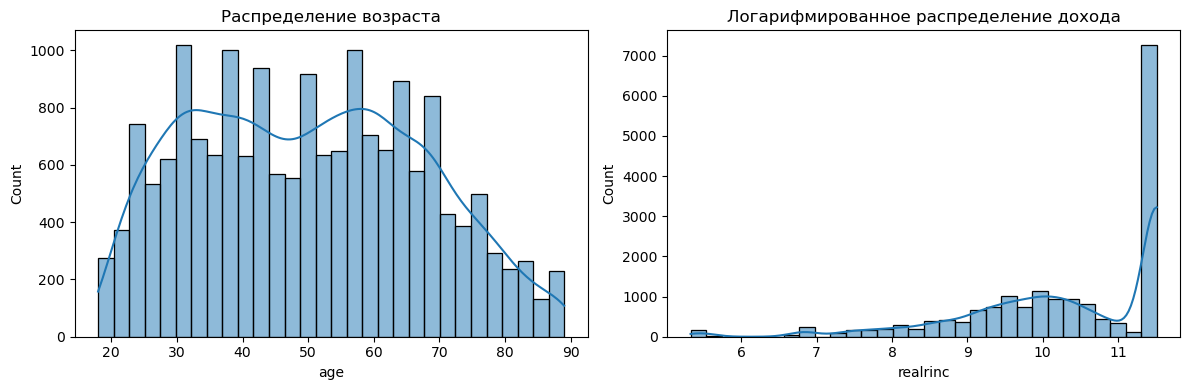

In [17]:
plt.figure(figsize=(12, 4))

# Распределение возраста
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Распределение возраста')

# Распределение дохода (логарифмическая шкала)
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['realrinc']), bins=30, kde=True)
plt.title('Логарифмированное распределение дохода');

plt.tight_layout()
plt.show();

Составим матрицу корреляций для выявления взаимосвязей между переменными:

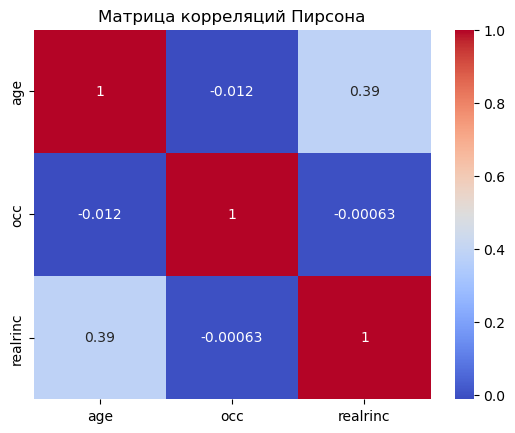

In [18]:
# Корреляционный анализ
sns.heatmap(df[['age', 'occ', 'realrinc']].corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Матрица корреляций Пирсона')
plt.show()

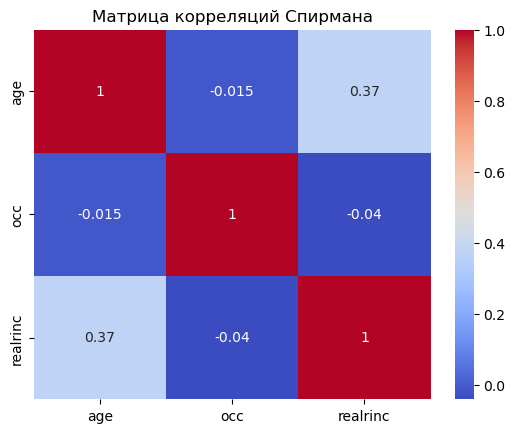

In [19]:
# Корреляционный анализ
sns.heatmap(df[['age', 'occ', 'realrinc']].corr(method='spearman'), annot=True, cmap='coolwarm')
plt.title('Матрица корреляций Спирмана')
plt.show()

# Анализ данных

<h3>1. В каком возрасте люди достигают наибольшего дохода</h3>

Создадим в датафрейме новый столбец, содержащий возрастной интервал, к которому относится респондент, с шагом 5 лет:

In [20]:
df['age_group'] = pd.cut(df['age'], bins=range(18, 91, 5), right=False)
df['age_group']

0        [28, 33)
1        [23, 28)
2        [68, 73)
4        [78, 83)
5        [38, 43)
           ...   
19342    [18, 23)
19343    [28, 33)
19344    [28, 33)
19345    [48, 53)
19346    [48, 53)
Name: age_group, Length: 17921, dtype: category
Categories (14, interval[int64, left]): [[18, 23) < [23, 28) < [28, 33) < [33, 38) ... [68, 73) < [73, 78) < [78, 83) < [83, 88)]

Сгруппируем данные по возрастным группам и найдем средний и медианный доходы в каждой из них:

In [21]:
realrinc_by_age = df.groupby('age_group', observed=True)['realrinc'].agg(['mean', 'median']).reset_index()
realrinc_by_age

,age_group,mean,median
0,"[18, 23)",35869.563080,7122.5
1,"[23, 28)",33612.108124,14170.0
2,"[28, 33)",37791.864399,21060.0
3,"[33, 38)",39110.190647,23980.0
4,"[38, 43)",42647.017374,27607.5
5,"[43, 48)",45011.529010,29430.0
6,"[48, 53)",47526.974103,31927.5
7,"[53, 58)",48241.037304,31927.5
8,"[58, 63)",54268.206825,40900.0
9,"[63, 68)",65176.723657,100000.0


Визуализируем результат

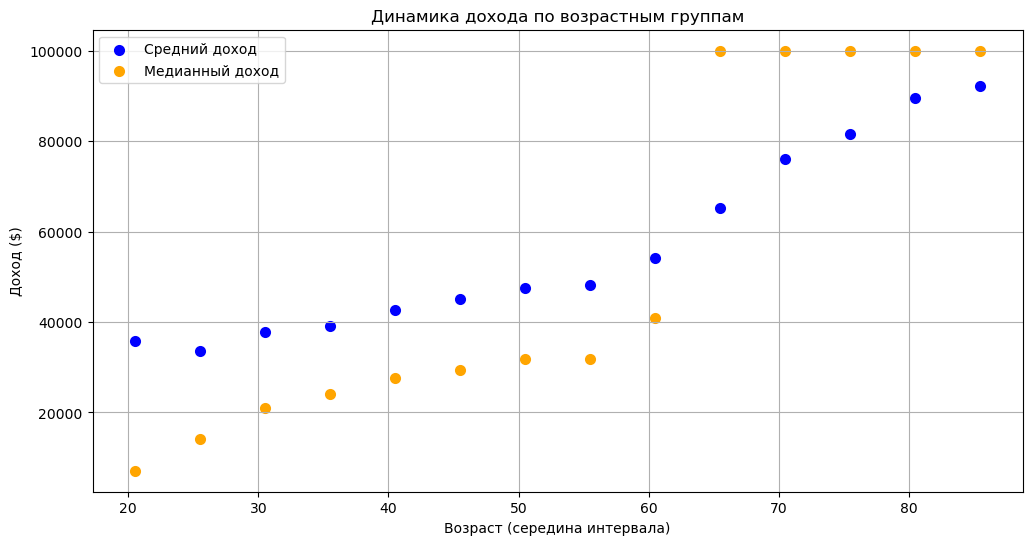

In [22]:
# Добавляем середину интервала для более наглядной визуализации
realrinc_by_age['age_mid'] = realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

# Строим график
plt.figure(figsize=(12, 6))
plt.scatter(realrinc_by_age['age_mid'], realrinc_by_age['mean'], label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(realrinc_by_age['age_mid'], realrinc_by_age['median'], label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
plt.show();

Построим также столбчатую диаграмму по возрастным группам отдельно для среднего дохода:

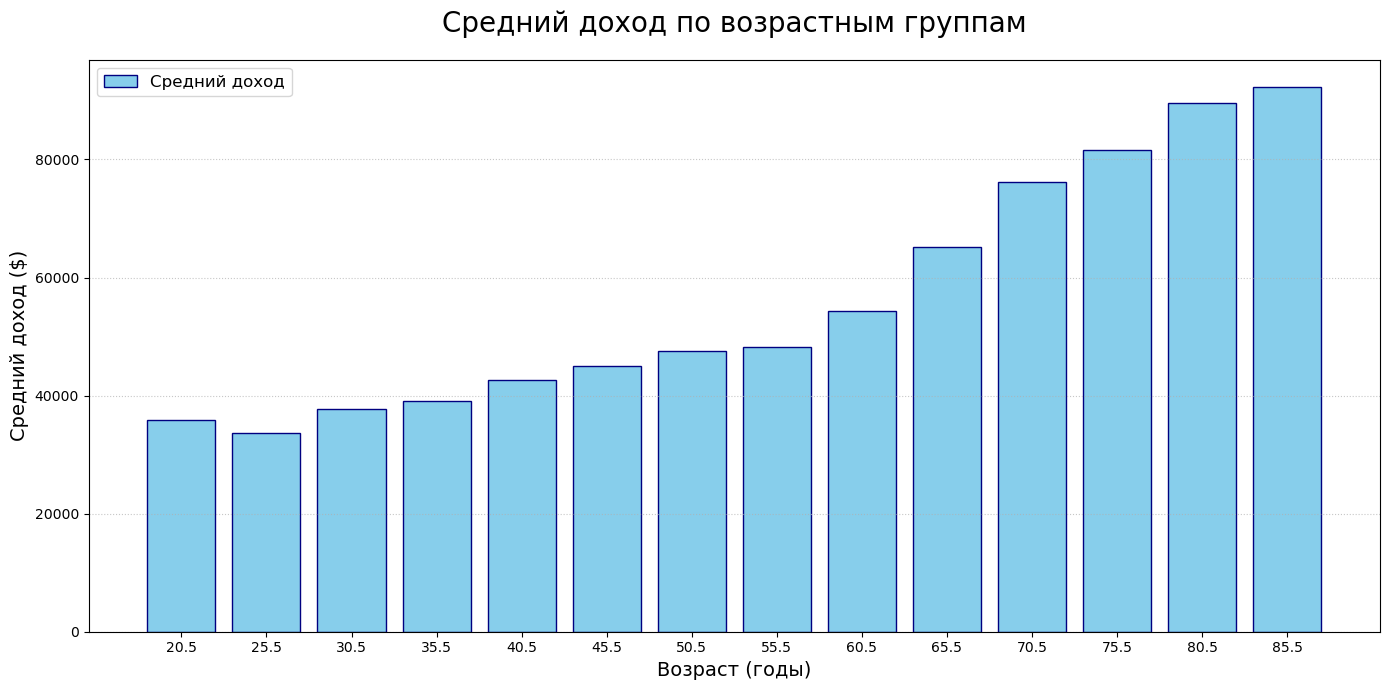

In [23]:
plt.figure(figsize=(14, 7))

bars = plt.bar(
    x=realrinc_by_age['age_mid'], height=realrinc_by_age['mean'], width=4,
    color='skyblue', edgecolor='navy', linewidth=1, label='Средний доход'
)

plt.title('Средний доход по возрастным группам', fontsize=20, pad=20)
plt.xlabel('Возраст (годы)', fontsize=14)
plt.ylabel('Средний доход ($)', fontsize=14)
plt.xticks(realrinc_by_age['age_mid'])
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

И для медианного дохода:

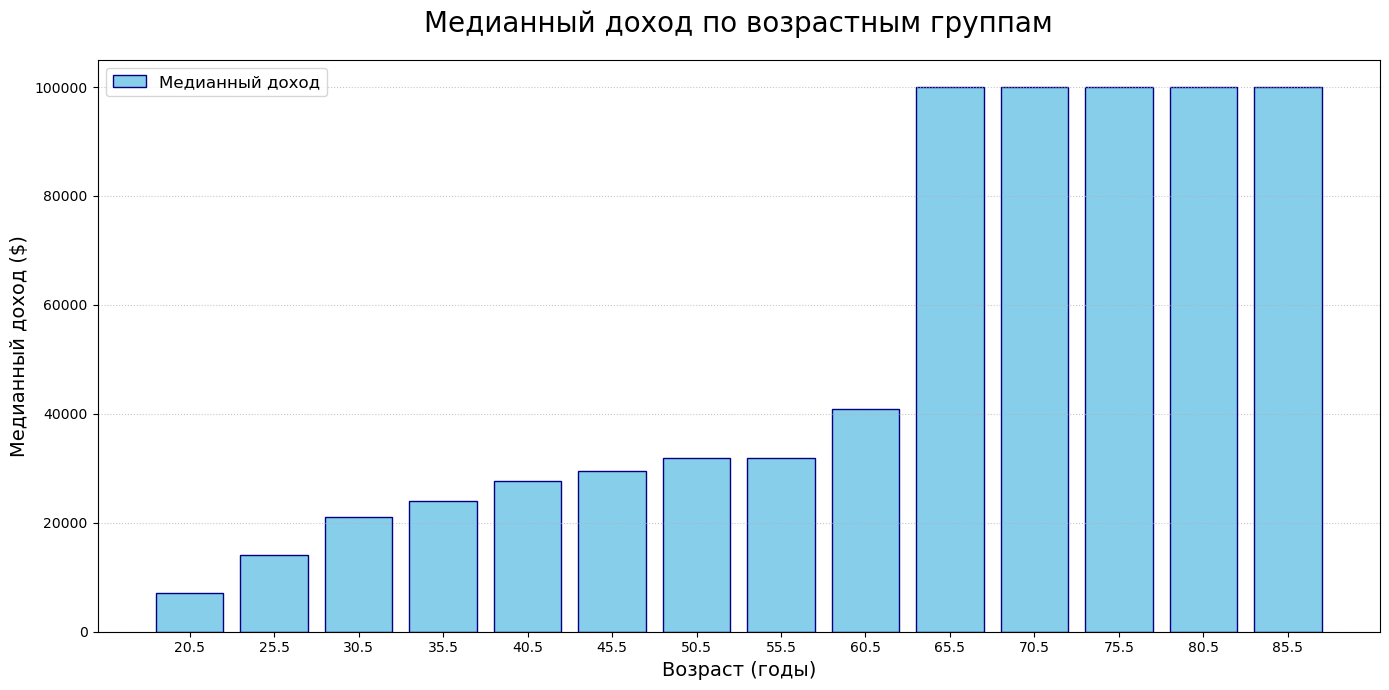

In [24]:
plt.figure(figsize=(14, 7))

bars = plt.bar(
    x=realrinc_by_age['age_mid'], height=realrinc_by_age['median'], width=4,
    color='skyblue', edgecolor='navy', linewidth=1, label='Медианный доход'
)

plt.title('Медианный доход по возрастным группам', fontsize=20, pad=20)
plt.xlabel('Возраст (годы)', fontsize=14)
plt.ylabel('Медианный доход ($)', fontsize=14)
plt.xticks(realrinc_by_age['age_mid'])
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Исходя из статистических показателей и графиков, можно сделать вывод, что явный рост как среднего, так и медианного доходов наблюдается всю жизнь.

<h3>2. В каком возрасте люди достигают наибольшего дохода в различных профессиях?</h3>

Далее рассмотрим 3 наиболее распространенных профессии из выборки и найдем для каждой из них возрастной промежуток, соответствующий наибольшему денежному доходу. Такими профессиями являются: учитель, медицинский работник и продавец.

Средний и медианный доходы по возрастным группами для учителя (код профессии - 2310):

In [25]:
teahcer_realrinc_by_age = df[df['occ'] == 2310].groupby('age_group', observed=True)['realrinc'].agg(['mean', 'median']).reset_index()
teahcer_realrinc_by_age

,age_group,mean,median
0,"[18, 23)",3337.000000,2951.00
1,"[23, 28)",18419.427083,15210.00
2,"[28, 33)",31224.310345,22050.00
3,"[33, 38)",33686.339286,24475.00
4,"[38, 43)",36977.172222,23980.00
5,"[43, 48)",34858.461538,25740.00
6,"[48, 53)",37911.105769,28048.75
7,"[53, 58)",41589.048077,30037.50
8,"[58, 63)",55590.706250,43600.00
9,"[63, 68)",69493.730769,100000.00


Визуализируем результаты среднего дохода по возрастным группам для учителя:

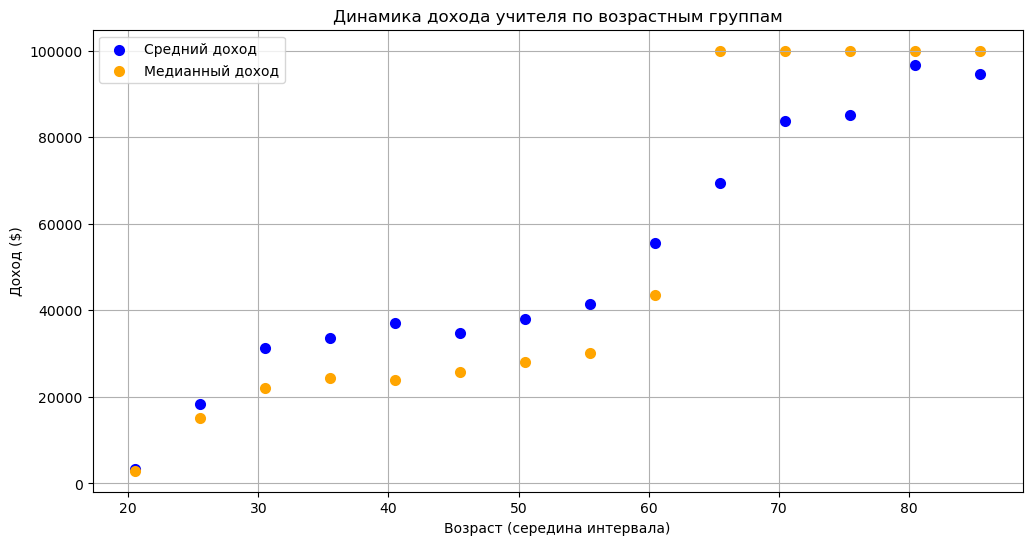

In [26]:
teahcer_realrinc_by_age['age_mid'] = teahcer_realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

plt.figure(figsize=(12, 6))
plt.scatter(teahcer_realrinc_by_age['age_mid'], teahcer_realrinc_by_age['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(teahcer_realrinc_by_age['age_mid'], teahcer_realrinc_by_age['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода учителя по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
plt.show();

Средний и медианный доходы по возрастным группами для медицинского работника (код профессии - 3255):

In [27]:
medic_realrinc_by_age = df[df['occ'] == 3255].groupby('age_group', observed=True)['realrinc'].agg(['mean', 'median']).reset_index()
medic_realrinc_by_age

,age_group,mean,median
0,"[18, 23)",872.000000,872.00
1,"[23, 28)",28087.900000,25877.50
2,"[28, 33)",42074.734848,29430.00
3,"[33, 38)",38518.653846,30037.50
4,"[38, 43)",45895.058140,33742.50
5,"[43, 48)",42064.714286,34965.00
6,"[48, 53)",44434.128571,37455.00
7,"[53, 58)",41543.177632,34353.75
8,"[58, 63)",44156.604167,33742.50
9,"[63, 68)",71134.208333,100000.00


Визуализируем результаты среднего дохода по возрастным группам для медицинского работника:

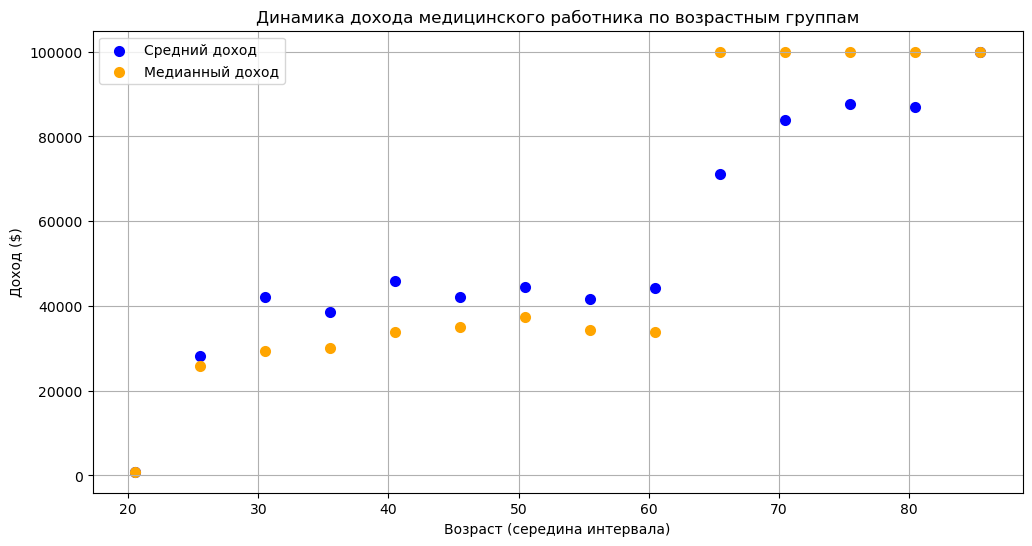

In [28]:
medic_realrinc_by_age['age_mid'] = medic_realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

plt.figure(figsize=(12, 6))
plt.scatter(medic_realrinc_by_age['age_mid'], medic_realrinc_by_age['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(medic_realrinc_by_age['age_mid'], medic_realrinc_by_age['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода медицинского работника по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
plt.show();

Средний и медианный доходы по возрастным группами для продавца (код профессии - 4760):

In [29]:
seller_realrinc_by_age = df[df['occ'] == 4760].groupby('age_group', observed=True)['realrinc'].agg(['mean', 'median']).reset_index()
seller_realrinc_by_age

,age_group,mean,median
0,"[18, 23)",21282.560606,4410.00
1,"[23, 28)",34887.269231,10051.25
2,"[28, 33)",38270.283784,13475.00
3,"[33, 38)",60649.543478,100000.00
4,"[38, 43)",48298.508333,27115.00
5,"[43, 48)",37577.818966,22495.00
6,"[48, 53)",34635.000000,8175.00
7,"[53, 58)",28119.925926,14170.00
8,"[58, 63)",58359.902174,100000.00
9,"[63, 68)",48383.060606,29430.00


Визуализируем результаты среднего дохода по возрастным группам для продавца:

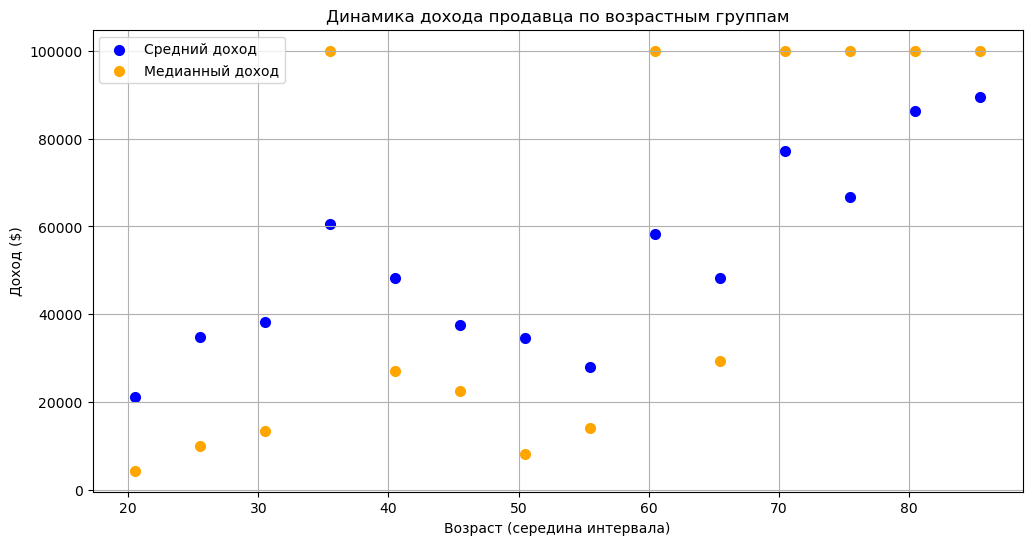

In [30]:
seller_realrinc_by_age['age_mid'] = seller_realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

plt.figure(figsize=(12, 6))
plt.scatter(seller_realrinc_by_age['age_mid'], seller_realrinc_by_age['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(seller_realrinc_by_age['age_mid'], seller_realrinc_by_age['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода продавца по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
plt.show();


Теперь объединим все профессии, связанные с IT-сферой, и попробуем найти возраст, на который приходится наибольший доход, для них. Сделаем отбор таких профессий:

In [31]:
it_codes = [1005, 1006, 1007, 1010, 1020, 1021, 1030, 1040, 1050, 1060, 1105, 1106]
df_it = df[df['occ'].isin(it_codes)].copy()
df_it

,age,occ,realrinc,year,age_group
36,84.0,1050.0,2331.0,2010,"[83, 88)"
48,45.0,1050.0,34965.0,2010,"[43, 48)"
52,49.0,1020.0,42735.0,2010,"[48, 53)"
115,59.0,1105.0,51800.0,2010,"[58, 63)"
140,28.0,1007.0,100000.0,2010,"[28, 33)"
...,...,...,...,...,...
18942,50.0,1020.0,65440.0,2022,"[48, 53)"
18958,73.0,1006.0,100000.0,2022,"[73, 78)"
19081,66.0,1010.0,33742.5,2022,"[63, 68)"
19086,63.0,1050.0,11247.5,2022,"[63, 68)"


Найдем средний и медианный доход по возрастным группам для IT-специалистов:

In [32]:
it_stats = df_it.groupby('age_group', observed=True)['realrinc'].agg(['mean', 'median']).reset_index()
it_stats

,age_group,mean,median
0,"[18, 23)",38954.833333,15273.75
1,"[23, 28)",33753.795455,26811.25
2,"[28, 33)",49088.271930,39022.50
3,"[33, 38)",45279.390351,37455.00
4,"[38, 43)",48212.916667,40900.00
5,"[43, 48)",58867.738095,48190.00
6,"[48, 53)",53510.405405,43600.00
7,"[53, 58)",57477.575758,52320.00
8,"[58, 63)",53255.257143,51800.00
9,"[63, 68)",64611.328125,57940.00


Визуализируем результат:

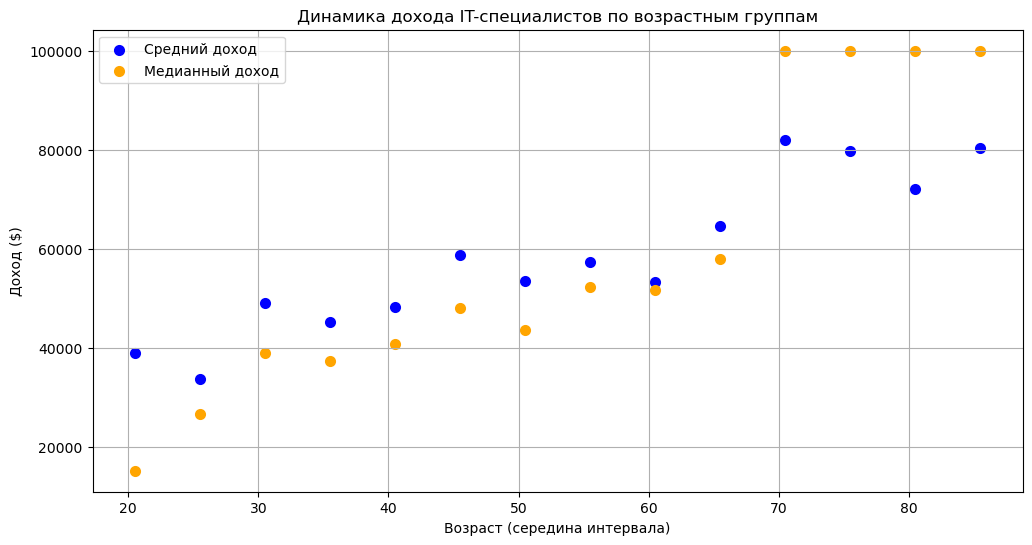

In [33]:
it_stats['age_mid'] = it_stats['age_group'].apply(lambda x: x.left + 2.5)

plt.figure(figsize=(12, 6))
plt.scatter(it_stats['age_mid'], it_stats['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(it_stats['age_mid'], it_stats['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода IT-специалистов по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
plt.show();

Из матрицы корреляций видно, что на доход влияет как сама профессия, так и возраст респондента. Визуализируем ниже общий график зависимости дохода от возраста для всех профессий.

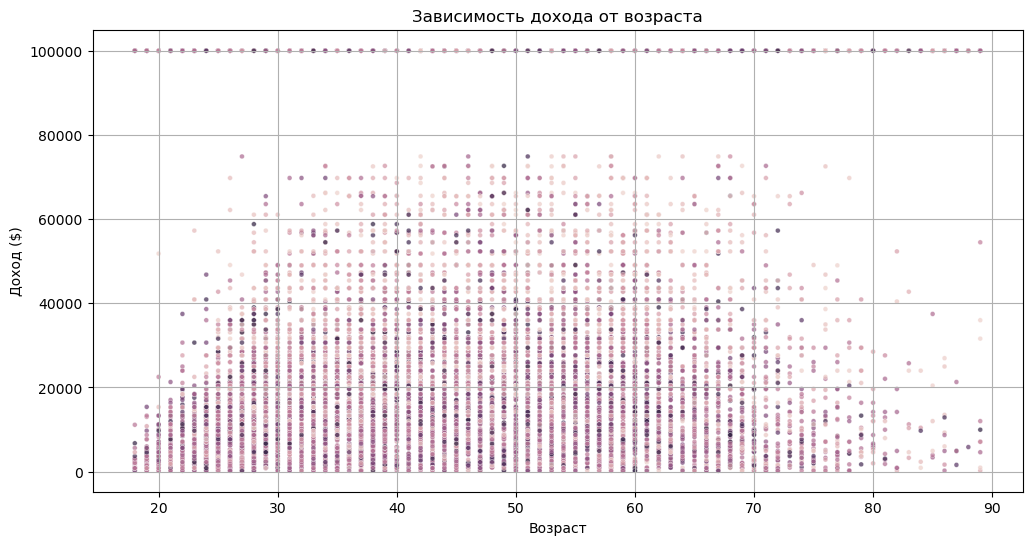

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df.age, y=df.realrinc, s=12, alpha=0.7, hue=df.occ).legend().remove()
plt.grid()
plt.xlabel("Возраст")
plt.ylabel('Доход ($)')
plt.title('Зависимость дохода от возраста')
plt.show()

Как ранее и было сказано, сначала доход человека растет, в независимости от профессии, далее выходит на постояный уровень, после чего идет на спад в связи с выходом на пенсию. Построим и сравним 2 модели: доход ~ возраст + возраст в квадрате и доход ~ возраст + возраст в квадрате + профессия. Поскольку возраст показывает зависимость, похожую на параболлическую, а не линейную добавим к моделям возраст в квадрате.

In [35]:
import statsmodels.api as sm

X = df[['age']]
y = df.realrinc
X = sm.add_constant(X)
model1 = sm.OLS(y, X.astype(float)).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     3141.
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:39:31   Log-Likelihood:            -2.1436e+05
No. Observations:               17921   AIC:                         4.287e+05
Df Residuals:                   17919   BIC:                         4.287e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6973.6075    859.681      8.112      0.0

In [36]:
df = pd.get_dummies(df, columns=['occ'])

In [37]:
X = df.drop(labels=['age_group', 'realrinc', 'year'], axis=1)
y = df.realrinc
X = sm.add_constant(X)
model2 = sm.OLS(y, X.astype(float)).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     8.088
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:39:31   Log-Likelihood:            -2.1393e+05
No. Observations:               17921   AIC:                         4.289e+05
Df Residuals:                   17418   BIC:                         4.328e+05
Df Model:                         502                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8177.5142   1109.251      7.372      0.0

Таким образом, мы получили две модели.
1. Ограниченная модель доход ~ возраст + возраст в квадрате. Согласно протоколу, модель бесполезная, поскольку она не объясняет никак дисперсии зависимой переменной (R-squared практически 0). С другой стороны, F-статистика с p-value близкому к нулю говорит о статистической значимости модели. Следует отметить, что оба коэффициента - intercept и при age - статистически значимы, так как значения их p-value равны нулю. Данная картина подталкивает нас на расширение модели.
2. Расширенная модель доход ~ возраст + возраст в квадрате + профессия. Данная модель показывает себя лучше ограниченной - p-value F-статистики равно нулю, а R-squared близко к 0.3. Константа в данном случае также остается значимой, как и переменная возраста, а вот некоторые признаки, образованные one-hot кодированием не являются статистически значимыми, потому что p-value > 0.05.

Визуализируем ниже обе модели

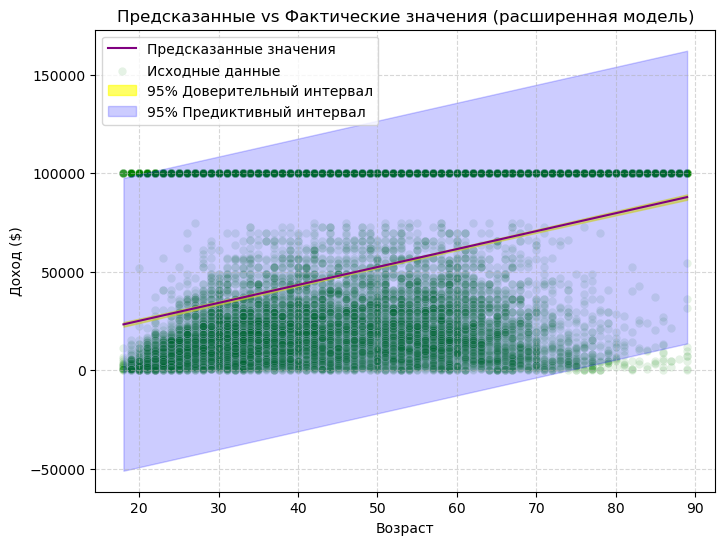

In [38]:
# Создаем новые данные
x_pred = np.linspace(df['age'].min(), df['age'].max(), 100)

# Объединяем в DataFrame
X_pred = pd.DataFrame({
    'const': 1,
    'age': x_pred,
})

# Получаем предсказания
pred = model1.get_prediction(X_pred)
pred_df = pred.summary_frame(alpha=0.05)

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(x_pred, pred_df['mean'], color='purple', label='Предсказанные значения')
sns.scatterplot(x=df['age'], y=df['realrinc'], color='green', alpha=0.1, label='Исходные данные')

# Доверительный интервал
plt.fill_between(x_pred, pred_df['mean_ci_lower'], pred_df['mean_ci_upper'], color='yellow', alpha=0.6, label='95% Доверительный интервал')

# Предсказательный интервал
plt.fill_between(x_pred, pred_df['obs_ci_lower'], pred_df['obs_ci_upper'], color='blue', alpha=0.2, label='95% Предиктивный интервал')

plt.title('Предсказанные vs Фактические значения (расширенная модель)')
plt.xlabel('Возраст')
plt.ylabel('Доход ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

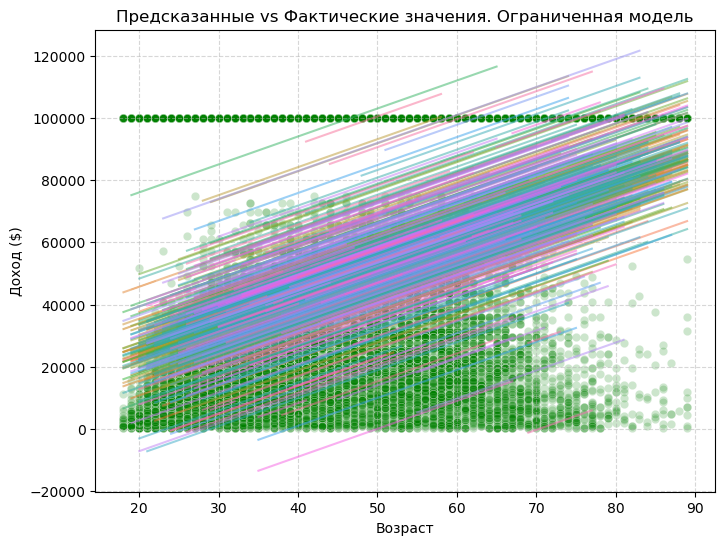

In [39]:
plt.figure(figsize=(8, 6))
df['occ'] = df[X.columns[2:]].idxmax(axis=1)
df['occ'] = df['occ'].str.replace('occ_', '')
sns.lineplot(data=df, x=df.age, y=model2.fittedvalues, alpha=0.5, hue='occ').legend().remove()
sns.scatterplot(y=df.realrinc, x=df.age, color='green', alpha=0.2).legend().remove()

plt.title('Предсказанные vs Фактические значения. Ограниченная модель')
plt.xlabel('Возраст')
plt.ylabel('Доход ($)')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

# Выводы

1. Распределение возраста похоже на нормальное с ожидаемым диапазоном (18-89 лет), но с дополнительной правосторонней асимметрией, что характерно для социальных и демографических данных.
2. Распределение дохода имеет ярко выраженную правостороннюю асимметрию и значительный разброс значений, что довольно-таки типично для доходов, поскольку в подавляющем большинстве сфер присутствует непропорциональность в распределении доходов и прибыли.
3. В топ-10 наиболее распространенных профессий вошли: учитель, медицинский работник, продавец, повар, секретарь, грузчик, сотрудник службы поддержки клиентов, уборщик, водитель, кассир.
4. Что возраст, что профессия являются статистически значимыми признаками для построения модели линейной регрессии.
5. Неограниченная модель регрессии пригодна для минимального прогноза, пусть и имеет низкий R-squared, тем не менее, модель статистически значима и позволяет предсказывать доход в отличие от ограниченной.

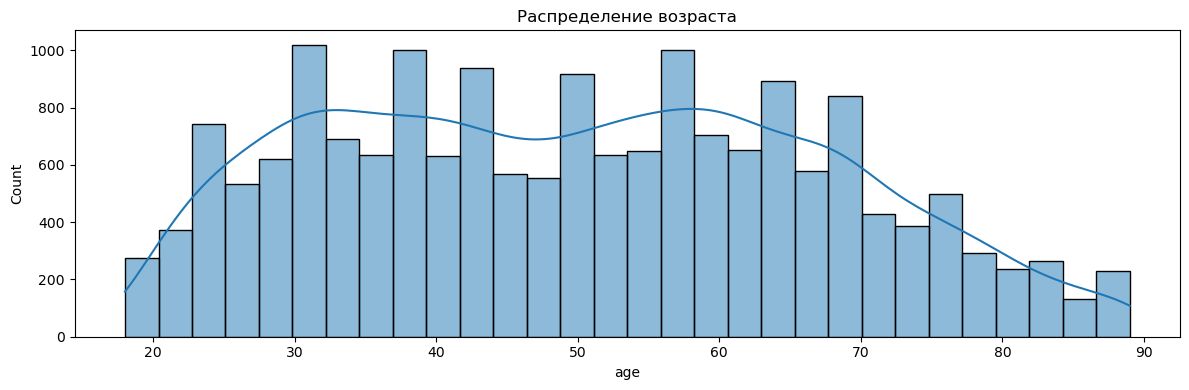

In [40]:
plt.figure(figsize=(12, 4))

# Распределение возраста
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Распределение возраста')

plt.tight_layout()
plt.show();

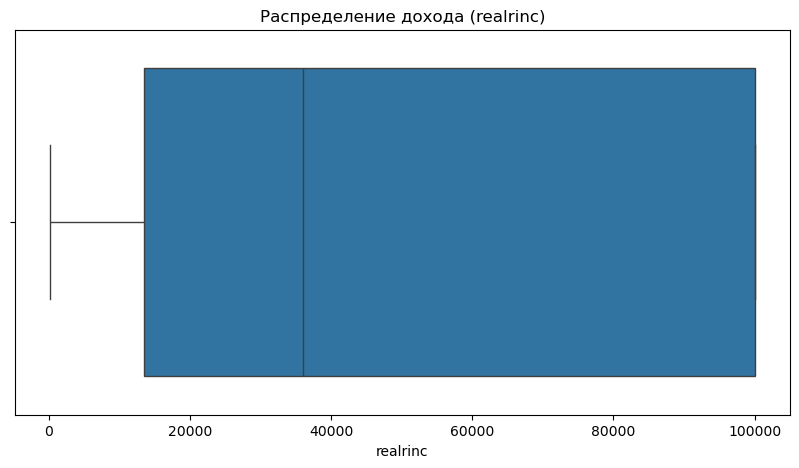

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['realrinc'])
plt.title('Распределение дохода (realrinc)')
plt.show()

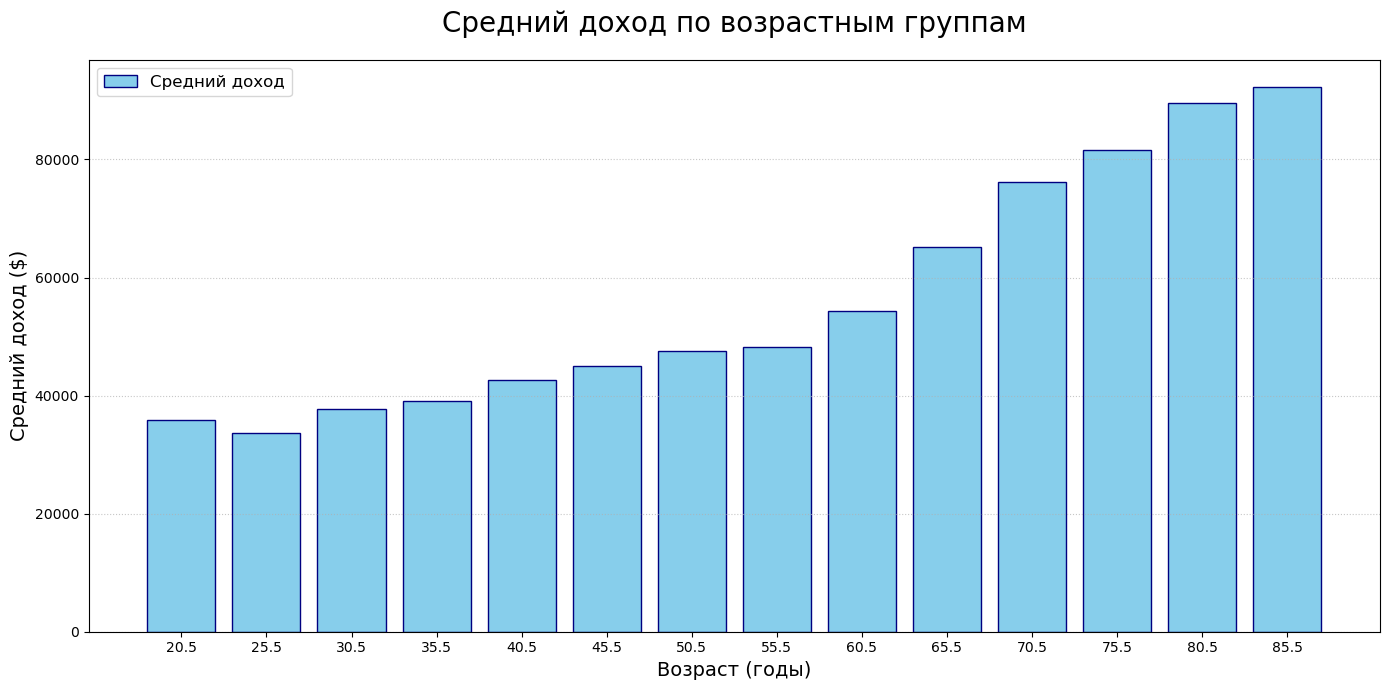

In [42]:
plt.figure(figsize=(14, 7))

bars = plt.bar(
    x=realrinc_by_age['age_mid'], height=realrinc_by_age['mean'], width=4,
    color='skyblue', edgecolor='navy', linewidth=1, label='Средний доход'
)

plt.title('Средний доход по возрастным группам', fontsize=20, pad=20)
plt.xlabel('Возраст (годы)', fontsize=14)
plt.ylabel('Средний доход ($)', fontsize=14)
plt.xticks(realrinc_by_age['age_mid'])
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

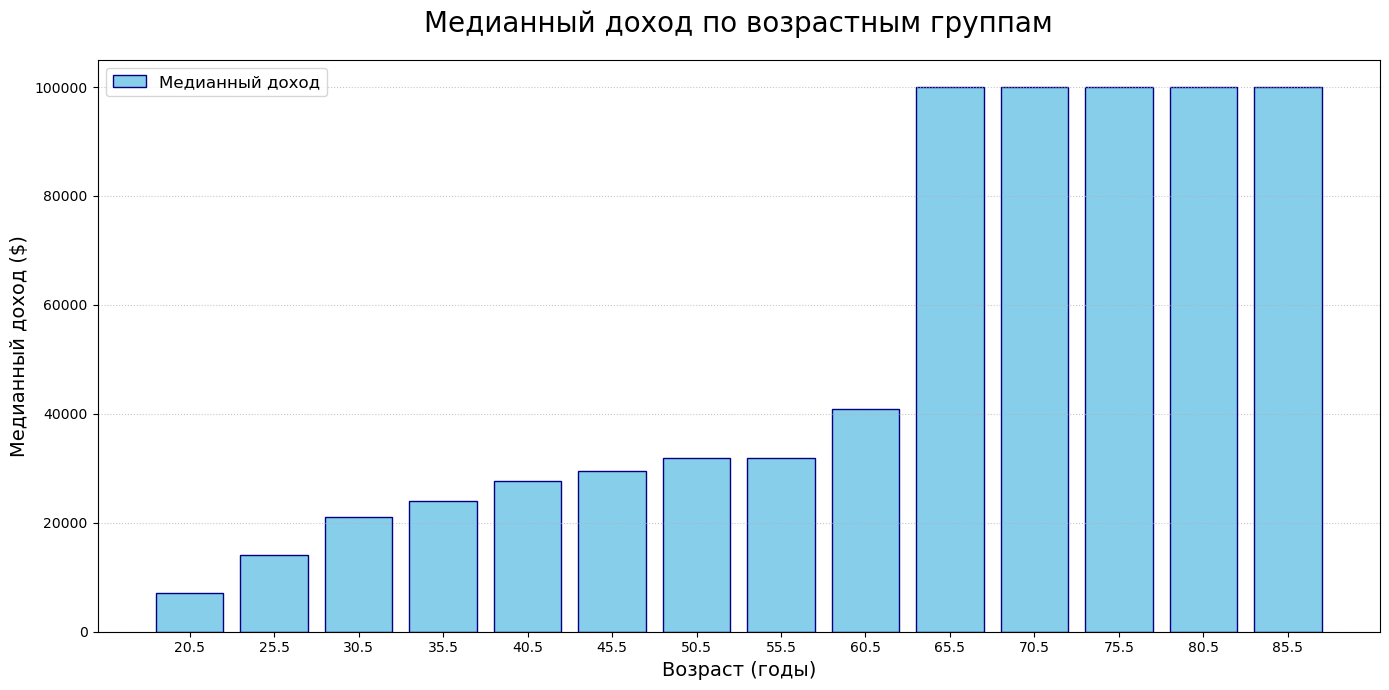

In [43]:
plt.figure(figsize=(14, 7))

bars = plt.bar(
    x=realrinc_by_age['age_mid'], height=realrinc_by_age['median'], width=4,
    color='skyblue', edgecolor='navy', linewidth=1, label='Медианный доход'
)

plt.title('Медианный доход по возрастным группам', fontsize=20, pad=20)
plt.xlabel('Возраст (годы)', fontsize=14)
plt.ylabel('Медианный доход ($)', fontsize=14)
plt.xticks(realrinc_by_age['age_mid'])
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

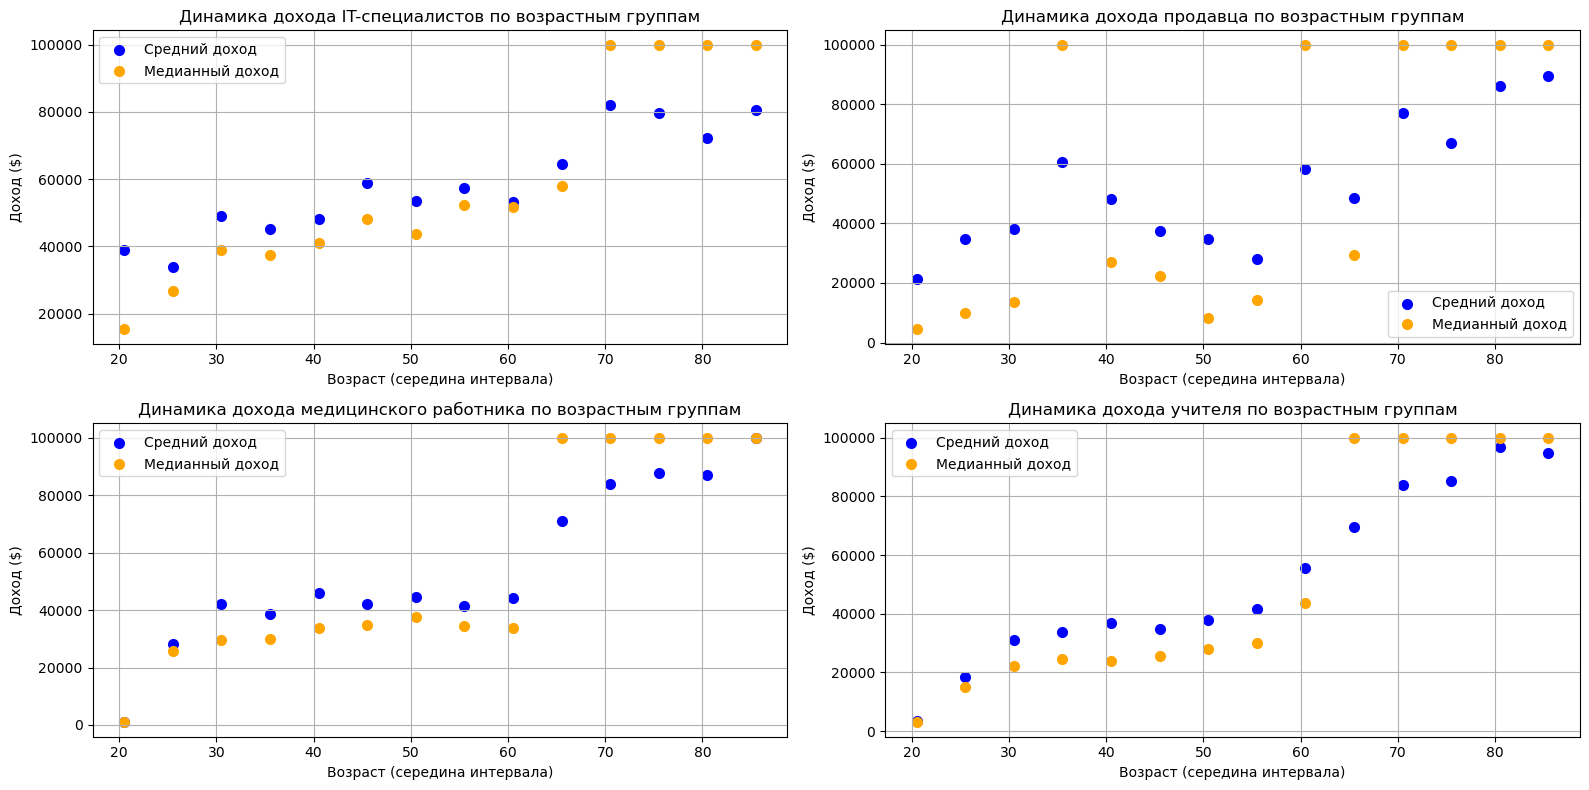

In [44]:
it_stats['age_mid'] = it_stats['age_group'].apply(lambda x: x.left + 2.5)

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
plt.scatter(it_stats['age_mid'], it_stats['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(it_stats['age_mid'], it_stats['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода IT-специалистов по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
seller_realrinc_by_age['age_mid'] = seller_realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

plt.subplot(2, 2, 2)
plt.scatter(seller_realrinc_by_age['age_mid'], seller_realrinc_by_age['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(seller_realrinc_by_age['age_mid'], seller_realrinc_by_age['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода продавца по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
medic_realrinc_by_age['age_mid'] = medic_realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

plt.subplot(2, 2, 3)
plt.scatter(medic_realrinc_by_age['age_mid'], medic_realrinc_by_age['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(medic_realrinc_by_age['age_mid'], medic_realrinc_by_age['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода медицинского работника по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
teahcer_realrinc_by_age['age_mid'] = teahcer_realrinc_by_age['age_group'].apply(lambda x: x.left + 2.5)

plt.subplot(2, 2, 4)
plt.scatter(teahcer_realrinc_by_age['age_mid'], teahcer_realrinc_by_age['mean'], 
         label='Средний доход', marker='o', linewidth=2,color='blue')
plt.scatter(teahcer_realrinc_by_age['age_mid'], teahcer_realrinc_by_age['median'], 
         label='Медианный доход', marker='o', linewidth=2,color='orange')
plt.title('Динамика дохода учителя по возрастным группам')
plt.xlabel('Возраст (середина интервала)')
plt.ylabel('Доход ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();

In [45]:
# Наиболее популярные профессии
print("\nТоп-10 самых распространенных профессий:")
print(df['occ'].value_counts().head(10))


Топ-10 самых распространенных профессий:
occ
2310.0    449
5700.0    435
3255.0    385
3600.0    384
4760.0    365
9130.0    340
430.0     331
4700.0    312
4220.0    308
5240.0    297
Name: count, dtype: int64


In [46]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               realrinc   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     8.088
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        23:40:20   Log-Likelihood:            -2.1393e+05
No. Observations:               17921   AIC:                         4.289e+05
Df Residuals:                   17418   BIC:                         4.328e+05
Df Model:                         502                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8177.5142   1109.251      7.372      0.0